A)


One question that could be asked as a telecommunications service provider could be:

What can this data set and all it's variables tell us about some of the causes of customer churn?

B)



| Name                  | Type     | Example                             |
|-----------------------|----------|-------------------------------------|
| CaseOrder             | int64    | 1                                   |
| Customer_id           | object   | K409198                             |
| Interaction           | object   | aa90260b-4141-4a24-8e36-b04ce1f4f77b|
| City                  | object   | Point Baker                         |
| State                 | object   | AK                                  |
| County                | object   | Prince of Wales-Hyder               |
| Zip                   | int64    | 99927                               |
| Lat                   | float64  | 56.25100                            |
| Lng                   | float64  | -133.37571                          |
| Population            | int64    | 38                                  |
| Area                  | object   | Urban                               |
| Timezone              | object   | America/Sitka                       |
| Job                   | object   | Environmental health practitioner   |
| Children              | float64  | 1.0                                 |
| Age                   | float64  | 68.0                                |
| Education             | object   | Master's Degree                     |
| Employment            | object   | Part Time                           |
| Income                | float64  | 28561.99                            |
| Marital               | object   | Widowed                             |
| Gender                | object   | Male                                |
| Churn                 | object   | No                                  |
| Outage_sec_perweek    | float64  | 6.972566                            |
| Email                 | int64    | 10                                  |
| Contacts              | int64    | 0                                   |
| Yearly_equip_failure  | int64    | 1                                   |
| Techie                | object   | No                                  |
| Contract              | object   | One year                            |
| Port_modem            | object   | Yes                                 |
| Tablet                | object   | Yes                                 |
| InternetService       | object   | Fiber Optic                         |
| Phone                 | object   | Yes                                 |
| Multiple              | object   | No                                  |
| OnlineSecurity        | object   | Yes                                 |
| OnlineBackup          | object   | Yes                                 |
| DeviceProtection      | object   | No                                  |
| TechSupport           | object   | No                                  |
| StreamingTV           | object   | No                                  |
| StreamingMovies       | object   | Yes                                 |
| PaperlessBilling      | object   | Yes                                 |
| PaymentMethod         | object   | Credit Card (automatic)             |
| Tenure                | float64  | 6.795513                            |
| MonthlyCharge         | float64  | 171.449762                          |
| Bandwidth_GB_Year     | float64  | 904.536110                          |
| item1                 | int64    | 5                                   |
| item2                 | int64    | 5                                   |
| item3                 | int64    | 5                                   |
| item4                 | int64    | 3                                   |
| item5                 | int64    | 4                                   |
| item6                 | int64    | 0                                   |
| item7                 | int64    | 3                                   |
| item8                 | int64    | 4                                   |


<span style="font-weight:300;font-size:16px">
  


# C)

### 1)


&emsp;&emsp;The first step I will use to assess the data quality is to identify missing values.
In python missing values can be detected with the df.isna().sum() function and its variations such as df.iloc[5].isna().sum()


&emsp;&emsp;The second step I will use to assess the data quality is to identify duplicates rows based on customer_id column. I will do this with the pandas library with the df.duplicated()function. Duplicate rows can also be identifed based on a subset of columns such as
df.duplicated(subset=['Customer_id']).


&emsp;&emsp;The third step I will use to assess the data quality is to identify outliers. I will use the python describe() function first to check if further analysis is needed. I will identify outliers with frequency counts such as df['Your_Column_Name'].value_counts(), z-scores such as zscore(df[column_name]), or plot a histogram such as df['values'].hist() plt.show() with the matplotlib library.
  
  
  
### 2)
   
   
&emsp;&emsp;This is an effective approach to assess the quality of the data set because it addresses several quality metrics such as outliers, duplicates, and missingness. The python libraries and functions used are effective at working on large data sets. This approach also accounts for the characteristics of the data. Histograms, frequency counts, and the describe() function can be used on categorical data to identify outliers, while z-scores are preferred for numerical data.
 
 

### 3)


&emsp;&emsp;Python and the matplotlib, pandas, and scipy library are a good choice for data cleaning on this project. One reason is that I am familiar with python language. Another reason is that python and the associated libraries automate a lot of the statistical work. Stats.z-scores will return the z-scores of the data in one step so you don't have to do each step manually to calculate the z-score for each data point. Python and the associated libraries also have related functions that can mitigate some of the data quality issues as well as identifying them.

</span>




In [1]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming your CSV file is named 'data.csv', adjust the file path as needed
file_path = '/home/dj/skewl/d206/churn_raw_data.csv'
pd.set_option('display.max_columns', None)
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(file_path)
#drop index column
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

# DETECTION STEPS

In [2]:

# Identify missing values using isna() method
missing_values = df.isna().sum()
# Print DataFrame with True for missing values and False for non-missing values
print(missing_values)

# found lots of missing values here!

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [3]:
#function to reset data
def reset_data():
    import pandas as pd
    file_path = '/home/dj/skewl/d206/churn_raw_data.csv'
    pd.set_option('display.max_columns', None)
    # Read the data from the CSV file into a DataFrame
    global df
    df = pd.read_csv(file_path)
    df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [4]:
# Find duplicate rows 
duplicate_rows = df.duplicated(["Customer_id"]).sum()

# Print duplicate rows   # found NO duplicate rows here!
print(duplicate_rows)


0


In [5]:
#function to list outliers by Z-score

def get_outliers_z(col_name):
    
    df['zscore'] = zscore(df[col_name])
    outliers = df.query('zscore > 3 | zscore < -3')
    print(f"number of outliers= {len(outliers)}")
    print(f"\n Z-score of outliers= \n{outliers['zscore']}")
    del df['zscore']


In [6]:
#function to list outliers by interquartile range

def get_iqr_outliers(col_name):
    # calculate IQR for column Height
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = df[(df[col_name] < Q1 - threshold * IQR) | (df[col_name] > Q3 + threshold * IQR)]
    print(f"outliers = {len(outliers)}")


In [7]:
#function to plot histogram
def plot_hist(col_name, num_bins, do_rotate=False):
    plt.hist(df[col_name], bins=num_bins)
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col_name}')
    if do_rotate:
        plt.xticks(rotation=90)
    plt.show()


In [8]:
# print row count that matches a value
def row_count_by_value(value):
    
    value_to_match = value
    row_count_matching_value = (df == value_to_match).sum()
    print(row_count_matching_value)

In [9]:
def print_counts(col_name):
    print(df[col_name].value_counts())

In [10]:
#function to print missing values
def print_desc(col_name):
    print(df[col_name].describe())
    print(f"missing values= {df[col_name].isna().sum()}")

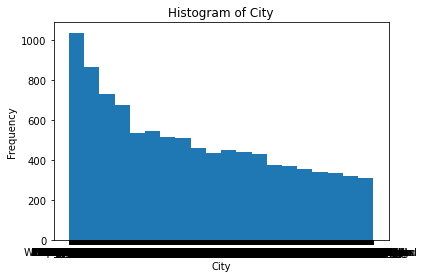

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object
missing values= 0


In [11]:
#looks good
plot_hist("City",20)
print_desc("City")

In [12]:
#looks good
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object
missing values= 0


In [13]:
#no issues here
print_desc("CaseOrder")

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: CaseOrder, dtype: float64
missing values= 0


In [14]:
#no issues here
print_desc("State")

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object
missing values= 0


In [15]:
#no issues here
print_desc("Interaction")

count                                    10000
unique                                   10000
top       aa90260b-4141-4a24-8e36-b04ce1f4f77b
freq                                         1
Name: Interaction, dtype: object
missing values= 0


In [16]:
#no issues
print_desc("Customer_id")

count       10000
unique      10000
top       K409198
freq            1
Name: Customer_id, dtype: object
missing values= 0


In [17]:
#no issues
print_desc("County")

count          10000
unique          1620
top       Washington
freq             111
Name: County, dtype: object
missing values= 0


In [18]:
# there's a problem here because this should be an int. Note the min value!
print_desc("Zip")

count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
25%      26292.500000
50%      48869.500000
75%      71866.500000
max      99929.000000
Name: Zip, dtype: float64
missing values= 0


In [19]:
#looks good
print_desc("Lat")

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64
missing values= 0


In [20]:
#looks good
print_desc("Lng")

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64
missing values= 0


count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
missing values= 0


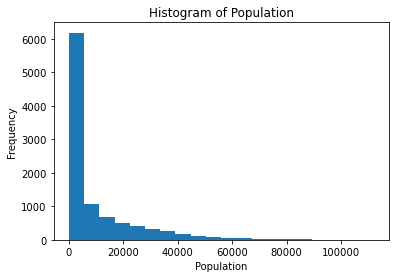

In [21]:

#this could be bad data. There is 6000 places with 0 population according to census.
#change this to int

print_desc("Population")
plot_hist("Population",20)

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object
missing values= 0


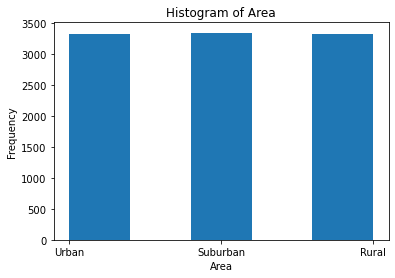

In [22]:
#looks good. Equal distribution.
print_desc("Area")
plot_hist("Area",5)

In [23]:
# something wrong. There should only be 24 timezones!
print_desc("Timezone")
df["Timezone"].value_counts()

count                10000
unique                  25
top       America/New_York
freq                  4072
Name: Timezone, dtype: object
missing values= 0


America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: Timezone, dtype: in

In [24]:
#looks good
print_desc("Job")

count                         10000
unique                          639
top       Occupational psychologist
freq                             30
Name: Job, dtype: object
missing values= 0


count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64
missing values= 2495


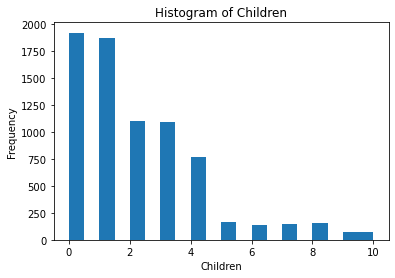

In [25]:
#lots of missing values change to int and impute
print_desc("Children")
plot_hist("Children",20)

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64
missing values= 2475


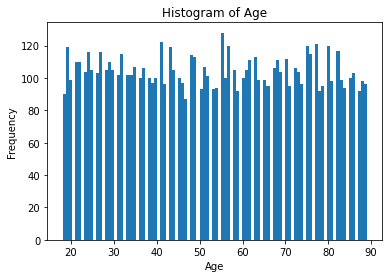

In [26]:
#lots of missing values change to int and impute.
print_desc("Age")
plot_hist("Age",100)

count                           10000
unique                             12
top       Regular High School Diploma
freq                             2421
Name: Education, dtype: object
missing values= 0


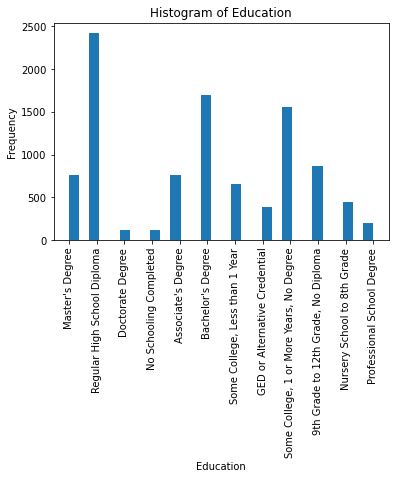

In [27]:
#looks good
print_desc("Education")
plot_hist("Education",30,True)

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object
missing values= 0


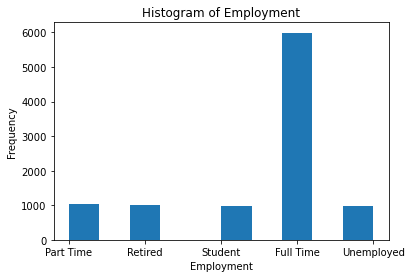

In [28]:
#looks good
print_desc("Employment")
plot_hist("Employment",10)

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64
missing values= 2490


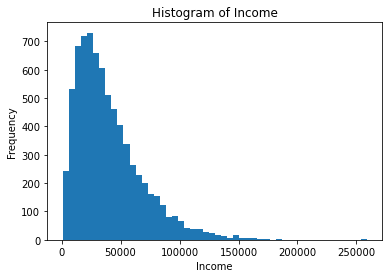

In [29]:
#this is bad data because there is so many missing values.
print_desc("Income")
plot_hist("Income",50)

In [30]:
#looks good
print_desc("Marital")
print_counts("Marital")

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object
missing values= 0
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64


In [31]:
#looks good
print_desc("Gender")
print_counts("Gender")

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object
missing values= 0
Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64


In [32]:
#looks good
print_desc("Churn")
print_counts("Churn")

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object
missing values= 0
No     7350
Yes    2650
Name: Churn, dtype: int64


count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64
missing values= 0


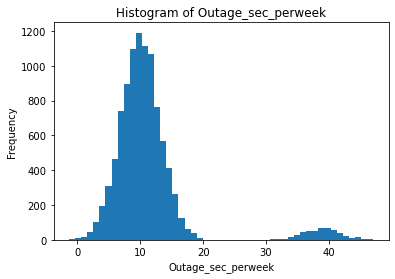

number of outliers= 491

 Z-score of outliers= 
28      4.622272
36      4.735879
40      3.907495
61      4.046782
130     4.020157
          ...   
9894    4.703786
9895    4.160788
9907    3.853321
9945    3.968939
9950    4.201985
Name: zscore, Length: 491, dtype: float64


In [33]:
#need to drop the rows with negative values
print_desc("Outage_sec_perweek")
plot_hist("Outage_sec_perweek",50)
get_outliers_z("Outage_sec_perweek")

In [34]:
#looks good
print_desc("Email")

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64
missing values= 0


In [35]:
#looks good but change this to int!
print_desc("Contacts")

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64
missing values= 0


In [36]:
#looks good but change this to Int!
print_desc("Yearly_equip_failure")

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64
missing values= 0


In [37]:
#lots of missing values. Need to impute
print_desc("Techie")

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object
missing values= 2477


In [38]:
#looks good
print_desc("Contract")
print_counts("Contract")

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object
missing values= 0
Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64


In [39]:
#looks good
print_desc("Port_modem")

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object
missing values= 0


In [40]:
#looks good
print_desc("Tablet")

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object
missing values= 0


In [41]:
#looks good
print_desc("InternetService")
print_counts("InternetService")

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object
missing values= 0
Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


In [42]:
#missing a lot of values
print_desc("Phone")
print_counts("Phone")

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object
missing values= 1026
Yes    8128
No      846
Name: Phone, dtype: int64


In [43]:
#looks good
print_desc("Multiple")
print_counts("Multiple")

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object
missing values= 0
No     5392
Yes    4608
Name: Multiple, dtype: int64


In [44]:
#looks good
print_desc("OnlineSecurity")
print_counts("OnlineSecurity")

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object
missing values= 0
No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64


In [45]:
#looks good
print_desc("DeviceProtection")
print_counts("DeviceProtection")

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object
missing values= 0
No     5614
Yes    4386
Name: DeviceProtection, dtype: int64


In [46]:
#lots of missing values here
print_desc("TechSupport")
print_counts("TechSupport")

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object
missing values= 991
No     5635
Yes    3374
Name: TechSupport, dtype: int64


In [47]:
#looks good
print_desc("StreamingTV")
print_counts("StreamingTV")

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object
missing values= 0
No     5071
Yes    4929
Name: StreamingTV, dtype: int64


In [48]:
#looks good
print_desc("StreamingMovies")
print_counts("StreamingMovies")

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object
missing values= 0
No     5110
Yes    4890
Name: StreamingMovies, dtype: int64


In [49]:
#looks good
print_desc("PaperlessBilling")
print_counts("PaperlessBilling")

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object
missing values= 0
Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64


In [50]:
#looks good
print_desc("PaymentMethod")
print_counts("PaymentMethod")

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object
missing values= 0
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64


In [51]:
#lots of missing values!
print_desc("Tenure")

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64
missing values= 931


In [52]:
#looks good
print_desc("MonthlyCharge")

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64
missing values= 0


In [53]:
#lots of missing values here!
print_desc("Bandwidth_GB_Year")

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64
missing values= 1021


In [54]:
#looks good but change to int
print_desc("item1")

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item1, dtype: float64
missing values= 0


In [55]:
#looks good but change to int
print_desc("item2")

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item2, dtype: float64
missing values= 0


In [56]:
#looks good but change to int
print_desc("item3")

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item3, dtype: float64
missing values= 0


In [57]:
#looks good but change to int
print_desc("item4")

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item4, dtype: float64
missing values= 0


In [58]:
#looks good but change to int
print_desc("item5")

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item5, dtype: float64
missing values= 0


In [59]:
#looks good but change to int
print_desc("item6")

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item6, dtype: float64
missing values= 0


In [60]:
#looks good but change to int
print_desc("item7")

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item7, dtype: float64
missing values= 0


In [61]:
#looks good but change to int
print_desc("item8")

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item8, dtype: float64
missing values= 0


# CLEAN UP STEPS

  # D
   ## 1)
    Duplicate rows:
     I could not find any duplicate rows based on the columns 'Customer_id'.

    Missing values:
      I found missing values in the columns 'Children', 'Age', 'Income', 'Techie','Phone','TechSupport','Tenure','Bandwith_GB_Year'.

    Outliers and anomalies:
       While z-scores and IQR analysis of many columns showed that there were outliers, I have decided that not all things have a normal distribution and the values seemed reasonable. The only column that has data anomalies is 'Outage_sec_per_week' which has negative values that should be cleaned up.

    
    

## 2)

        There were no duplicate rows according to my criteria so nothing will be done there. Missing values will be imputed using various techniques. I think this will preserve the data integrity better than dropping the rows with missing values. Dropping the rows would significantly affect the data set because some columns have thousands of missing values. The method used varies based on the column so I have provided a justification and summary for each column next to the annotated code cell.



### See below for detailed annotation of data cleaning above each code cell please.

## 3)

    I was able to mitigate all the anomalies without changing the distribution significantly. The method used varies on the column so I have provided a justification and summary for each column next to the annotated code cell.
### See below for detailed annotation of data cleaning outcome above each code cell please.

### 4)


### annotated clean up implementation code below.

### 5) 
cleaned .csv file will be attached as separate file. 

 ### children

 #### justification
       I used the bfill() and ffill() function to fill in the missing values because I believe it distributes the missing values more equally than using the mode or median. I can not use the interpolate() function because it would input floats into the missing values and we can't have 1.5 children. I changed the data type to int because children are more accurately described as integers.

 #### summarized outcome
        This method works well and did not change the distribution significantly of the data or cause any outliers.
  

count    10000.000000
mean         2.118900
std          2.183859
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64
missing values= 0


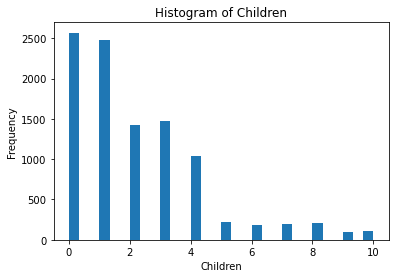

In [62]:
#replace missing values in children with ffill and bffill method
df['Children'].ffill(inplace=True)
df['Children'].bfill(inplace=True)
df['Children'] = df['Children'].astype(int)
print_desc("Children")
plot_hist("Children",30)

### Age

 #### justification
       I used the bfill() and ffill() function to fill in the missing values because I believe it distributes the missing values more equally than using the mode or median. I can not use the interpolate() function because it would input floats into the missing values and we can't have 1.5 for an age. I changed the data type to int because age is more accurately described as integers.

 #### summarized outcome
        This method works well and did not change the distribution significantly of the data or cause any outliers.
  

count    10000.000000
mean        53.274000
std         20.774183
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64
missing values= 0


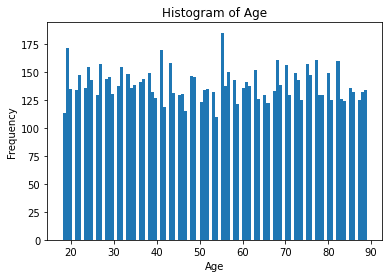

In [63]:
#replace missing values with ffill and bffill method and change type to int
df['Age'].ffill(inplace=True)
df['Age'].bfill(inplace=True)
df['Age'] = df['Age'].astype(int)
print_desc("Age")
plot_hist("Age",100)

### Income

 #### justification
       I used linear interpolation because this is a float and will give us the most equal distribution of missing value replacement.

 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count     10000.000000
mean      40100.429660
std       26748.898996
min         740.660000
25%       20710.382500
50%       34377.155000
75%       53027.285000
max      258900.700000
Name: Income, dtype: float64
missing values= 0


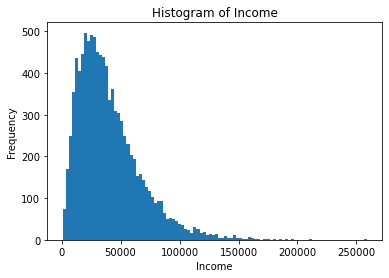

In [64]:
#replace missing values with linear interpolaton
df['Income'].interpolate(method='linear', inplace=True)
print_desc("Income")
plot_hist("Income",100)

### Techie

 #### justification
      I replaced the missing values with 'No' because I think that techies would be more likely to check the techie box in the questionnaire than non techies. Also I think it is better for the company to treat more people as non technical unless we know otherwise.

 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count     10000
unique        2
top          No
freq       8743
Name: Techie, dtype: object
missing values= 0


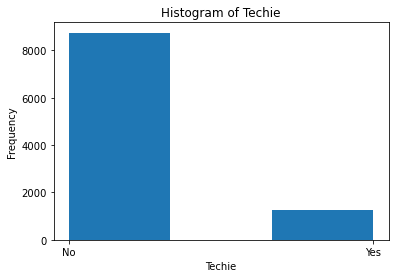

In [65]:
#replace missing values with no
df['Techie'] = df['Techie'].fillna("No")
print_desc("Techie")
plot_hist("Techie",3)

### Phone

 #### justification
      I replaced the missing values with the value from the 'Multiple' column because it logically follows that if a person has multiple lines they will have at least one phone.

 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count     10000
unique        2
top         Yes
freq       8578
Name: Phone, dtype: object
missing values= 0


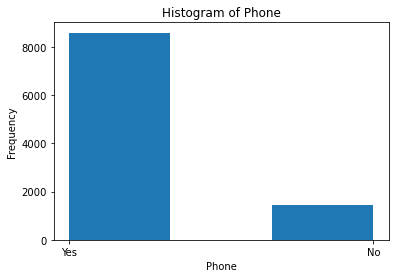

Yes    8578
No     1422
Name: Phone, dtype: int64


In [66]:
#impute missing values from multiple column
df['Phone'] = df['Phone'].fillna(df['Multiple'])
print_desc("Phone")
plot_hist("Phone",3)
print_counts("Phone")


### TechSupport

 #### justification
      I replaced the missing values with the value from the 'DeviceProtection' column because it logically follows that if a person has DeviceProtection they will also have tech support.

 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count     10000
unique        2
top          No
freq       6173
Name: TechSupport, dtype: object
missing values= 0


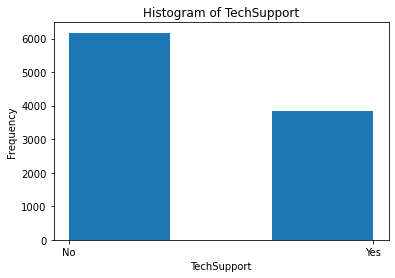

No     6173
Yes    3827
Name: TechSupport, dtype: int64


In [67]:
#impute missing values from multiple DeviceProtection column
df['TechSupport'] = df['TechSupport'].fillna(df['DeviceProtection'])
print_desc("TechSupport")
plot_hist("TechSupport",3)
print_counts("TechSupport")

### Tenure

 #### justification
       I used the bfill() and ffill() function to fill in the missing values because I believe distributes it the missing values more equally than using the mode or median. I can not use the interpolate() function because it would input floats into the missing values and we can't have 1.5 for a tenure. I changed the data type to int because tenure is more accurately described as integers.

 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count    10000.000000
mean        33.996700
std         26.430803
min          1.000000
25%          7.000000
50%         35.000000
75%         61.000000
max         71.000000
Name: Tenure, dtype: float64
missing values= 0


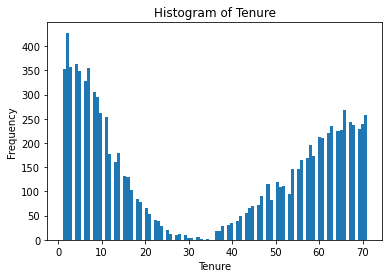

In [68]:

#replace missing values with ffill and bffill method and change type to int
df['Tenure'].ffill(inplace=True)
df['Tenure'].bfill(inplace=True)
df['Tenure'] = df['Tenure'].astype(int)
print_desc("Tenure")
plot_hist("Tenure",100)

### Bandwith_GB_year

 #### justification
      I used linear interpolation function to fill in the missing values because I believe distributes the missing values more equally than using the mode or median. Also it works well on floats.
 #### summarized outcome
        This method works well and did not change the distribution of the data significantly or cause any outliers.
  

count    10000.000000
mean      3394.481092
std       2185.672391
min        155.506715
25%       1238.450337
50%       3287.404879
75%       5583.729000
max       7158.982000
Name: Bandwidth_GB_Year, dtype: float64
missing values= 0


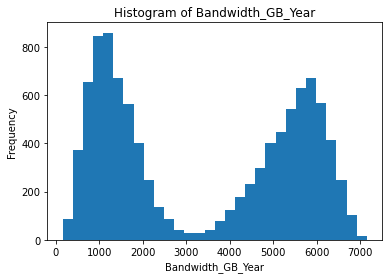

In [69]:
#replace missing values with mode
df['Bandwidth_GB_Year'].interpolate(method='linear', inplace=True)
print_desc('Bandwidth_GB_Year')
plot_hist('Bandwidth_GB_Year',30)

### Outage_sec_perweek

 #### justification
      I transformed this data by changing the negative values to positive because I made the assumption that the negative sign was a mistake.
 #### summarized outcome
        This method works well and did not change the distribution of the data very much or cause any outliers.
  

count    10000.000000
mean        11.454229
std          7.023844
min          0.113821
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64
missing values= 0


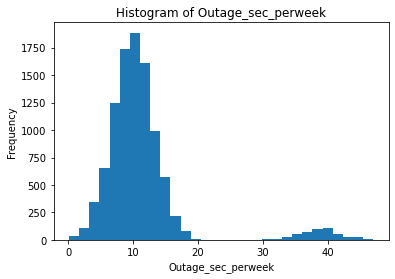

In [70]:
# make negative values positive.
df.loc[df['Outage_sec_perweek'] < 0, 'Outage_sec_perweek'] *= -1
print_desc("Outage_sec_perweek")
plot_hist("Outage_sec_perweek",30)

#### all missing values have been imputed.

In [71]:
# Identify missing values using isna() method
missing_values = df.isna().sum()
print(missing_values)
# missing values are replaced with meaningful data!

CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBil

### print cleaned data to csv file


In [72]:
# Print DataFrame to CSV file
df.to_csv('clean-data.csv', index=False)

## 6)

        Some limitations of the data cleaning process are that when a significant of values are missing, replacing them with any method changes the distribution to various degrees based on the amount of missing values. Regardless of the technique to replace the values, the missing values still skew the data. Another limitation is that without specific domain knowledge of the data set it is difficult to discrern which values are actually outliers and which are reasonable values. Z-scores and IQR techniques may indicate outliers even though the data is reasonable because the distribution for that variable is not normal.

## 7)
        The limitations summarized in part D6 will affect the analysis of the question from part A because the data had bad values that were negative or missing values. As a data analyst I have no Idea idea if they were bad values or they were just input incorrectly as negative. The approach I took for the 'Bandwithd_BG_Year' Column assumed that they just needed to be converted to positive values. If my assumption is wrong then the data will be skewed and my analysis may come to an incorrect conclusion. The missing values being imputed will change the distribution of the data. In summary, all missing data and the techniques used to clean it may have an affect on the analysis. I may come to the wrong conclusion about the correlation between the data and churn due to these limitations.

In [73]:
from sklearn.decomposition import PCA
import numpy as np
data = df.select_dtypes(include='number')
print(data.shape[1])
#normalize data
data_normalized=(data-data.mean())/data.std()
#start with max components
pca = PCA(n_components=data.shape[1])

#fit pca model to our data
pca.fit(data_normalized)
#transform data set to 23 PCA components
data_pca = pd.DataFrame(pca.transform(data_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
             'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'
              ,'PC18','PC19','PC20','PC21','PC22','PC23'])

loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
             'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'
              ,'PC18','PC19','PC20','PC21','PC22','PC23'],
     index=data.columns)


23


## E

1) The initial total number of principal components will be 23 because that is how many numeric fields we have.

In [74]:

print(loadings.head(23))

                           PC1       PC2       PC3       PC4       PC5  \
CaseOrder            -0.068102  0.549513  0.007672 -0.019086 -0.003139   
Zip                  -0.018617 -0.005785  0.701528  0.048017  0.026185   
Lat                   0.000253 -0.014663  0.029261 -0.005662 -0.702625   
Lng                   0.016456  0.006845 -0.704193 -0.045524  0.060469   
Population           -0.002452 -0.003143  0.064243  0.024968  0.676147   
Children              0.007658  0.001554 -0.023023  0.004903 -0.027425   
Age                  -0.000914 -0.001513 -0.006815 -0.027907 -0.009010   
Income               -0.003890  0.002557 -0.006885  0.025545 -0.067569   
Outage_sec_perweek   -0.014176  0.008447  0.006584 -0.044679 -0.098540   
Email                 0.009929 -0.010572 -0.011535 -0.006824  0.141244   
Contacts             -0.008833  0.002497 -0.009559 -0.011187  0.020479   
Yearly_equip_failure -0.008763  0.008664  0.011735  0.009791 -0.008055   
Tenure               -0.073649  0.5833

## 2)

  I chose to use 13 PCA components because all components beyond that have an eigenvalue of less than one. I am including plots of the eigenvalues and explained variance. I could use the elbow of the explained variance but I think the eigenvalues are more accurate.


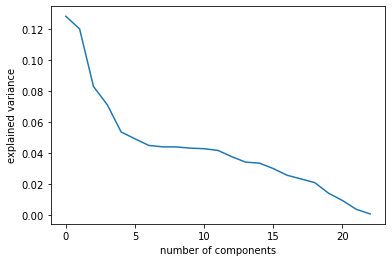

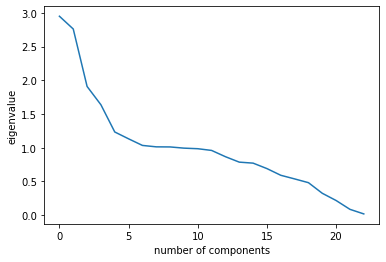

In [75]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

cov_matrix = np.dot(data_normalized.T, data_normalized) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 

## 3)
 I think the organization can benefit from PCA because it can simplify the visual analysis of the data when presenting it to stakeholders. Instead of
 showing them what could be hundreds of variables that may not have much effect on the analysis, we can reduce the variables and keep most of the accuracy of the model. Another benefit is noise filtering. The originization can benefit from PCA by having the benefit of using a model that is more accurate because it better identifies meaningful patterns. This will lead to better predictions and better models the organization uses to make business decisions.

## F)

panopto video submitted in links.

## G)

Citations:

Pandas documentation# (no date) pandas documentation - pandas 2.2.1 documentation. Available at: https://pandas.pydata.org/docs/ (Accessed: 06 April 2024). 



Project jupyter documentation# (no date) Project Jupyter Documentation - Jupyter Documentation 4.1.1 alpha documentation. Available at: https://docs.jupyter.org/en/latest/ (Accessed: 06 April 2024). 


Learn  scikit. Available at: https://scikit-learn.org/stable/ (Accessed: 06 April 2024). 

GfG (2024) How to drop unnamed column in pandas DataFrame, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-drop-unnamed-column-in-pandas-dataframe/ (Accessed: 06 April 2024). 


GfG (2024) How to drop unnamed column in pandas DataFrame, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-drop-unnamed-column-in-pandas-dataframe/ (Accessed: 06 April 2024). 